Before going further in Machine Learning model training, I've decided to determine if some of the feature in the *full* dataset might be useless for fitting models, or need some more improvements.

The first approach I'll use is a visual one, plotting Scatter Plots of the numerical values against the values of my dependent variable: *km_per_hour*

The goal here is to eliminate features that looks like to be **not** correlated with the dependent variable (first derivative of the linear function is null), identify any features which should be normalized using an *np.logxx()* approach, and apply *Plynomial increase approach* on features that looks like being correlated with the vector result using a *polynomial* function applied to their values.

In [1]:
# Load my_utils.ipynb in Notebook
from ipynb.fs.full.my_utils import *

Opening connection to database
Add pythagore() function to SQLite engine
Fraction of the dataset used to train models: 10.00%
my_utils library loaded :-)


# Load *full* dataset

Load the *full* dataset, store it in a global variable, and initialize two variables: x_columns and y_column.

> Note : Data is loaded from the *NPZ_DATAFILE* file which contains non normalized data. At the end of this Notebook, when data will be normalized, the result will be saved in the *NPZ_NORMALIZE_DATAFILE* file.


In [2]:
# Fraction of the dataset to load
DATASET_FRAC=0.01

# Load dataset dict
df, _, y_column, x_columns, _=load_dataset(frac=DATASET_FRAC, npz_filename=NPZ_DATAFILE, verbose=True)


Loading dataset 'full' from NPZ file ./data/capstone-data.npz
Apply correct dtype to dataset column
{'km_per_hour': 'float', 'pickup_longitude': 'float', 'pickup_latitude': 'float', 'dropoff_longitude': 'float', 'dropoff_latitude': 'float', 'distance_in_km': 'float', 'pickup_distance_to_STATION': 'float', 'dropoff_distance_to_STATION': 'float', 'diff_ELEVATION': 'float', 'WNP_AWND': 'float', 'WNP_PRCP': 'float', 'WNP_SNOW': 'float', 'WNP_SNWD': 'float', 'WNP_TAVG': 'float', 'WNP_TSTD': 'float', 'WND_AWND': 'float', 'WND_PRCP': 'float', 'WND_SNOW': 'float', 'WND_SNWD': 'float', 'WND_TAVG': 'float', 'WND_TSTD': 'float', 'store_and_fwd_flag': 'int', 'weekend': 'int', 'day_period_afternoon': 'int', 'day_period_evening': 'int', 'day_period_morning': 'int', 'passenger_alone': 'int', 'diff_ASCENDING': 'int', 'diff_DESCENDING': 'int', 'WC_WT01': 'int', 'WC_WT02': 'int', 'WC_WT03': 'int', 'WC_WT04': 'int', 'WC_WT06': 'int', 'WC_WT08': 'int', 'WC_WT09': 'int', 'WC_WT11': 'int', 'WC_WDIR_E': 'int

# Draw Scatter plots

To simplify the work, I will define a function that will draw a scatter plot from a continuous column, first removing lines with value == 0, and secondly remove outliers using [z-score](https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/) approach. This will help to decide what to do with those columns.

At the same time, this function will draw, on top of the scatter plots, *polynomial regression curves* that will be helpfull to identify any polynomial correlation between features and result vector.

The code of this function is inspired from the *drawScatterPlot()* I've implemented in my [course #3 project](https://github.com/epfl-extension-school/project-adsml19-c3-s9-3871-2111/blob/master/house-prices/house-prices-solution-1-of-2.ipynb)

> Note: Remember, the vector result *y*, *km_per_hour*, has been converted to its *no.log10()* value. *ylim* value passed to *drawScatterPlot()* should be set to [0,2] ;-)


Drawing graphs 4 x 5 (number of x_columns = 20)
Plotting feature: pickup_longitude
Plotting feature: pickup_latitude
Plotting feature: dropoff_longitude
Plotting feature: dropoff_latitude
Plotting feature: distance_in_km
Plotting feature: pickup_distance_to_STATION
Plotting feature: dropoff_distance_to_STATION
Plotting feature: diff_ELEVATION
Plotting feature: WNP_AWND
Plotting feature: WNP_PRCP
Plotting feature: WNP_SNOW
Plotting feature: WNP_SNWD
Plotting feature: WNP_TAVG
Plotting feature: WNP_TSTD
Plotting feature: WND_AWND
Plotting feature: WND_PRCP
Plotting feature: WND_SNOW
Plotting feature: WND_SNWD
Plotting feature: WND_TAVG
Plotting feature: WND_TSTD
Processing done, display result (may take some time)


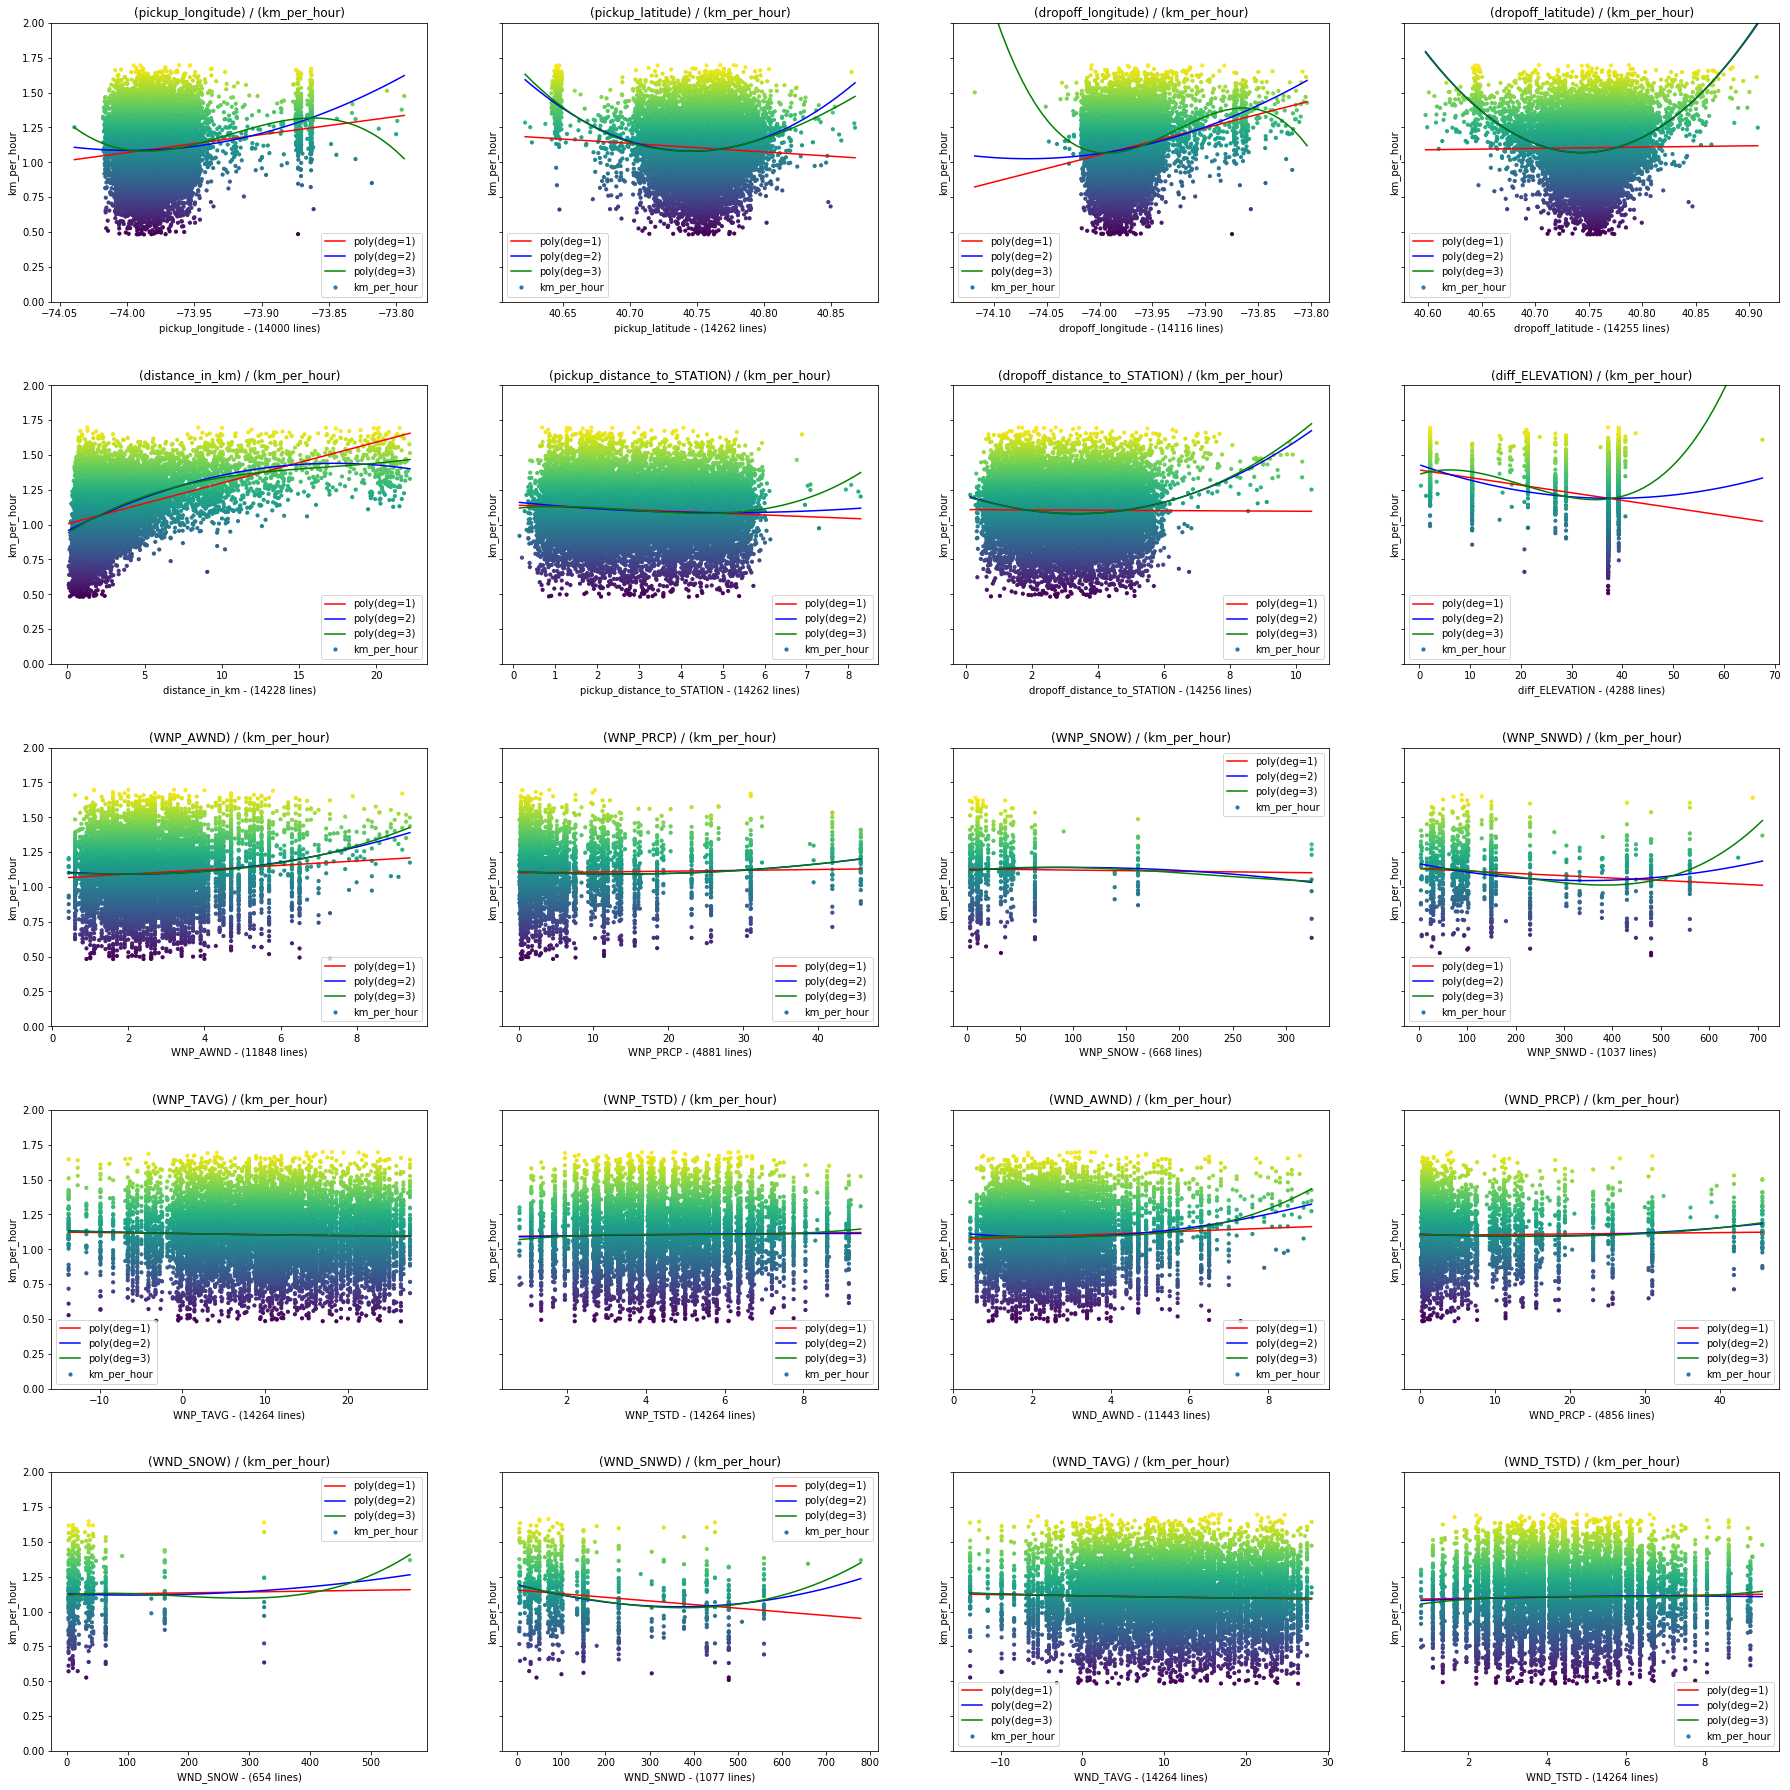

In [3]:
# Draw scatter plots of numerical features
draw_scatter_plot(dataset=df, x_columns=x_columns, y_column=y_column, polyfit_deg=3, figsize=(30,30), z_factor=5)

# What decisions those Scatter plots implies ?

## Polynomial feature increase approach

Looking at the polynomial curves on the scatter plots, I've identified one features that could be a good candidate for polynomial increase: *distance_in_km*

Let's add a new feature named *distance_in_km_square* which contains the square values of *distance_in_km* and plot the result.


In [4]:
# Store the square value of distance_in_k into distance_in_km_square
df['distance_in_km_square']=df['distance_in_km']**2

# Show result
df[['distance_in_km_square','distance_in_km']].head(2)

,distance_in_km_square,distance_in_km
789677,428.080199,20.690099
1176476,7.999932,2.828415


Drawing graphs 2 x 1 (number of x_columns = 2)
Plotting feature: distance_in_km
Plotting feature: distance_in_km_square
Processing done, display result (may take some time)


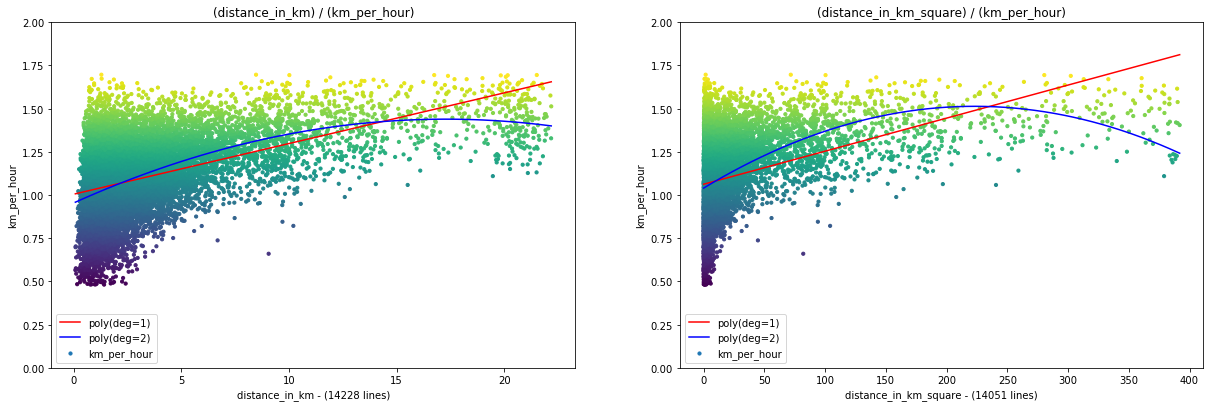

In [5]:
# scatter plot one feature and its square increased feature
draw_scatter_plot(dataset=df, x_columns=['distance_in_km', 'distance_in_km_square'], y_column=y_column, graph_per_line=2, polyfit_deg=2, figsize=(20,6), z_factor=5)


The result looks good, we can now drop the *distance_in_km* feature:

In [6]:
df.drop(['distance_in_km'], axis=1, inplace=True)

And finally normalize *distance_in_km_square* using *np.log()* transformation.

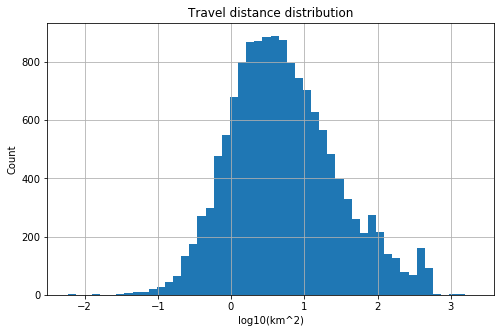

In [7]:
# Transform features values with np.log10()
df['distance_in_km_square_log10'] = np.log10(df['distance_in_km_square'])

# Display histogram
plt.figure(figsize=(8,5))
plt.title('Travel distance distribution')
df['distance_in_km_square_log10'].hist(bins=50)
plt.xlabel('log10(km^2)')
plt.ylabel('Count')
plt.show()

Ok, *distance_in_km* feature engineering looks good. Drop the *distance_in_km_square* and I am done with this first feature.

In [8]:
df.drop(['distance_in_km_square'], axis=1, inplace=True)


## Drop non correlated features

Non correlated numerical features in this dataset can be identified looking at the polynomial regression curve with degree=1. For that non-correlated features, the regression curve is a straight line with first derivative value equal to 0, in other words, whatever the value of the feature, the travel speed predicted by this polynomial regression is a fixed value.

For example, if we look at *WNP_TSTD* (Temperature standard deviation at pickup location), the polynomial curves are close to be horizontal lines.


### List of non-correlated features

TAVG, TSTD, PRCP and SNOW looks like non-correlated features.

SNWD, even if it looks apparently not correlated, I can see small correlation when its value increase. I've choosen to keep it (I will log transformed it later in this Notebook)


Drawing graphs 4 x 2 (number of x_columns = 8)
Plotting feature: WNP_PRCP
Plotting feature: WNP_SNOW
Plotting feature: WNP_TAVG
Plotting feature: WNP_TSTD
Plotting feature: WND_PRCP
Plotting feature: WND_SNOW
Plotting feature: WND_TAVG
Plotting feature: WND_TSTD
Processing done, display result (may take some time)


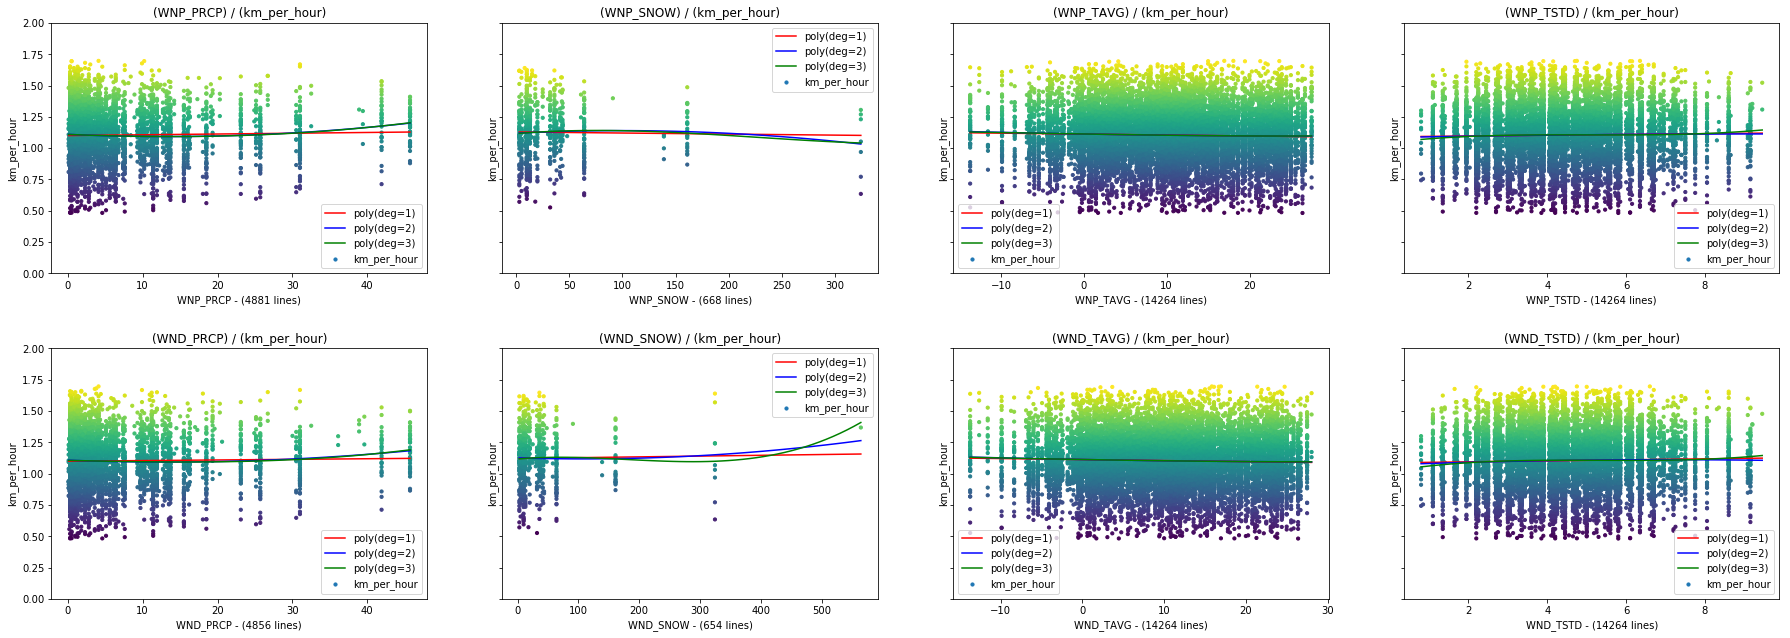

In [9]:
import re

# Build filtered column list
r = re.compile('.*TAVG.*|.*TSTD.*|.*SNOW.*|.*PRCP.*')
cols_to_drop=list(filter(r.match, x_columns))

# Draw scatter plots for TAVG, TSTD, PRCP and SNOW
draw_scatter_plot(dataset=df, x_columns=cols_to_drop, y_column=y_column, graph_per_line=4, polyfit_deg=3, figsize=(30,10), z_factor=5)

### Drop non-correlated columns

Decision made to drop those 8 non correlated columns

In [10]:
# Drop column and save dataset to alternate NPZ file
print("Columns to drop:", ','.join(cols_to_drop))
df.drop(cols_to_drop, axis=1, inplace=True)


Columns to drop: WNP_PRCP,WNP_SNOW,WNP_TAVG,WNP_TSTD,WND_PRCP,WND_SNOW,WND_TAVG,WND_TSTD


## A particular feature: *diff_ELEVATION*

Looking at the scatter plot of this feature, the distribution of the data points on the graph looks like to be quantified. This non linearity could be used to transform this numerical feature into a categorical one.

Finally, I've decided to keep this numerical feature as it is.


## Pickup and dropoff latitude

Those two features are globaly equaly distributed, the polynomial regression with degree=3 confirm this.

I will keep those two features as is, scaling pre-processing that will be applied during Machine Learning models training will normalize their values.

## Pickup and dropoff longitude

I'm a bit sceptic about those two features. I've tried some log transformations but the result did not convinced me.

I've choosen to keep them as is and let the Machine Learning model algorythms handle them.

## *np.log10()* to normalize other features.

The six remaining features, looking at their respective feature plots, shouold be normalized using an *np.log()* approach.

As I have null values for them, I'll use the *np.log1p()* method that takes care of null values (adding +1 to avoid infinite result)

Let's display their current scatter plots

Drawing graphs 3 x 2 (number of x_columns = 6)
Plotting feature: pickup_distance_to_STATION
Plotting feature: dropoff_distance_to_STATION
Plotting feature: WNP_AWND
Plotting feature: WNP_SNWD
Plotting feature: WND_AWND
Plotting feature: WND_SNWD
Processing done, display result (may take some time)


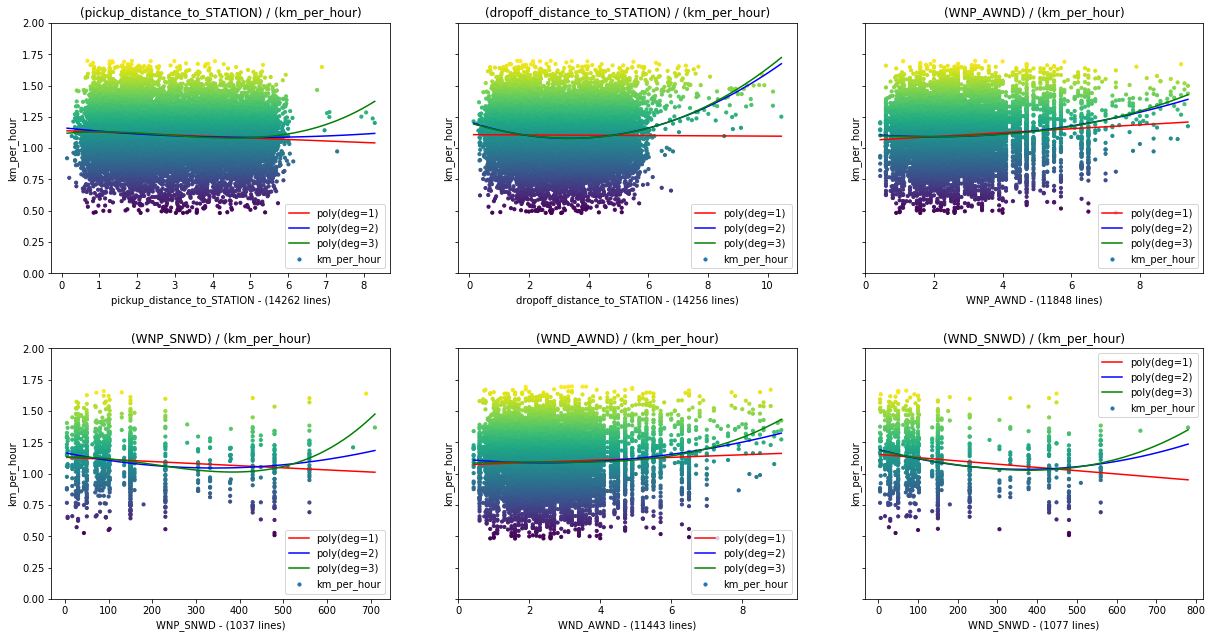

In [11]:
# Build filtered column list
r = re.compile('.*STATION.*|.*AWND.*|.*SNWD.*')
cols_to_log_transform=list(filter(r.match, x_columns))

# Draw scatter plots
draw_scatter_plot(dataset=df, x_columns=cols_to_log_transform, y_column=y_column, graph_per_line=3, polyfit_deg=3, figsize=(20,10), z_factor=5)

Transform their value and display the modified scatter plots

Drawing graphs 3 x 2 (number of x_columns = 6)
Plotting feature: pickup_distance_to_STATION_log1p
Plotting feature: dropoff_distance_to_STATION_log1p
Plotting feature: WNP_AWND_log1p
Plotting feature: WNP_SNWD_log1p
Plotting feature: WND_AWND_log1p
Plotting feature: WND_SNWD_log1p
Processing done, display result (may take some time)


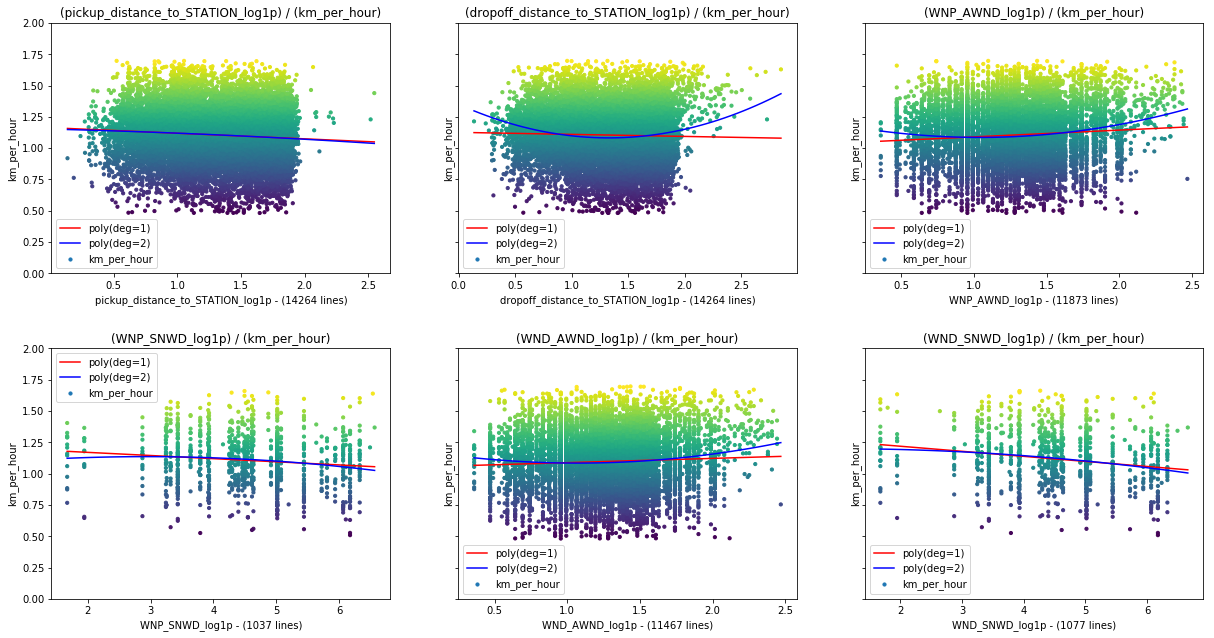

In [12]:
# Build log transformed features
new_cols=[]
for col in cols_to_log_transform:
    new_col=f'{col}_log1p'
    new_cols.append(new_col)
    df[new_col]=np.log1p(df[col])

# Display resulting scatter plots    
draw_scatter_plot(dataset=df, x_columns=new_cols, y_column=y_column, graph_per_line=3, polyfit_deg=2, figsize=(20,10), z_factor=5)


### A special case: pickup and dropoff distance to STATION

Looking at the polynomial regression degree=2 of the *pickup_distance_to_STATION* log transformed feature, it appears to be non correlated to the travel speed. On the opposite side, the *dropoff_distance_to_STATION* seems to have an influence on the result.

Even if that sound strange, this is what I can conclude looking at the previous Scatter plots.

So, what should I do ?

Drop the pickup one and keep the dropoff as is :-)

### What about *SNWD* features ?

Well, they're near to be non correlated as well, but the linear regression shows a little inverted correlation. Furthermore, I must avoid to drop too many features ;-)

So I'll decide to keep them log transformed.

## Data optimization done

Let reload the full dataset, re-apply the above transformations and drops, and save result into the *NPZ_NORMALIZED_DATAFILE*

# Save cleaned version of the full dataset

Here is the process to follow:

- Reload full dataset from NPZ file
- Do polynomial increase as described above
- Do log transformed as described above
- Drop unused columns
- Save it back to the *NPZ_FILENAME* NPZ file

## Load full dataset and numerical feature names

In [13]:
# Load full dataset and feature column names
df, _, y, x_columns, _=load_dataset(verbose=False, npz_filename=NPZ_DATAFILE)

print("Shape of the full dataset:", df.shape)

Shape of the full dataset: (1426415, 48)


## Add polynomial increase and log transformation to *distance_in_km* feature

In [14]:
# Increase and log transform
df['distance_in_km_square_log10'] = np.log10(df['distance_in_km']**2)
df.drop('distance_in_km', axis=1, inplace=True)

## Drop non-correlated features

In [15]:
# Drop column and save dataset to alternate NPZ file
print("Columns to drop:", ','.join(cols_to_drop))
df.drop(cols_to_drop, axis=1, inplace=True)

Columns to drop: WNP_PRCP,WNP_SNOW,WNP_TAVG,WNP_TSTD,WND_PRCP,WND_SNOW,WND_TAVG,WND_TSTD


## Log transform the needed features

In [16]:
# Build log transformed features
print("Columns to log transform:", cols_to_log_transform)

for col in cols_to_log_transform:
    df[f'{col}_log1p']=np.log1p(df[col])
    
df.drop(cols_to_log_transform, axis=1, inplace=True)


Columns to log transform: ['pickup_distance_to_STATION', 'dropoff_distance_to_STATION', 'WNP_AWND', 'WNP_SNWD', 'WND_AWND', 'WND_SNWD']


## Drop pickup_distance_to_STATION

> Note: This feature was in the list of log transformed columns. To drop it, we should drop the newly created feature: *pickup_distance_to_STATION_log1p*

In [17]:
df.drop('pickup_distance_to_STATION_log1p', axis=1, inplace=True)

## Save this new normalized full dataset

and save it to the *NPZ_NORMALIZED_DATAFILE* to keep the original one safe, in case of ;-)

In [18]:
# Save to NPZ
save_npz(dataset=df, npz_filename=NPZ_NORMALIZED_DATAFILE)

Numerical features:  pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,diff_ELEVATION,distance_in_km_square_log10,dropoff_distance_to_STATION_log1p,WNP_AWND_log1p,WNP_SNWD_log1p,WND_AWND_log1p,WND_SNWD_log1p
Categorical features:  store_and_fwd_flag,weekend,day_period_afternoon,day_period_evening,day_period_morning,passenger_alone,diff_ASCENDING,diff_DESCENDING,WC_WT01,WC_WT02,WC_WT03,WC_WT04,WC_WT06,WC_WT08,WC_WT09,WC_WT11,WC_WDIR_E,WC_WDIR_N,WC_WDIR_NE,WC_WDIR_NW,WC_WDIR_S,WC_WDIR_SE,WC_WDIR_SW,WC_WDIR_W,WC_PEAK_Y,WC_SNOW_FALL,WC_SNOW_ROAD
Build dict to pass to savez_compressed...
Query: SELECT * FROM stations
Query: SELECT * FROM stations LIMIT 1 OFFSET 0
Query: SELECT * FROM travel_improved
Query: SELECT * FROM travel_improved LIMIT 1 OFFSET 0
Query: SELECT * FROM weather_cat_improved
Query: SELECT * FROM weather_cat_improved LIMIT 1 OFFSET 0
Query: SELECT * FROM weather_num_improved
Query: SELECT * FROM weather_num_improved LIMIT 1 OFFSET 0
Save dict to NPZ file 

# Here we are

In [19]:
npz_dict=load_npz_as_dict(dataset='full', verbose=False)
print("Shape of this new dataset (stored in NPZ_NORMALIZED_DATAFILE):", npz_dict['dataset'].shape)

Shape of this new dataset (stored in NPZ_NORMALIZED_DATAFILE): (1426415, 39)


That's all folks for the Scatter Plots EDA journey ;-)

Let's continue with PCA on the next [notebook](22.Principal%20Component%20Analysis.ipynb)